Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [5]:
#define the features
X = heartdisease_df.iloc[:,:13]
y = heartdisease_df.iloc[:,13]
#Replace missing values

X= X.replace(to_replace='?', value=0)
#Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

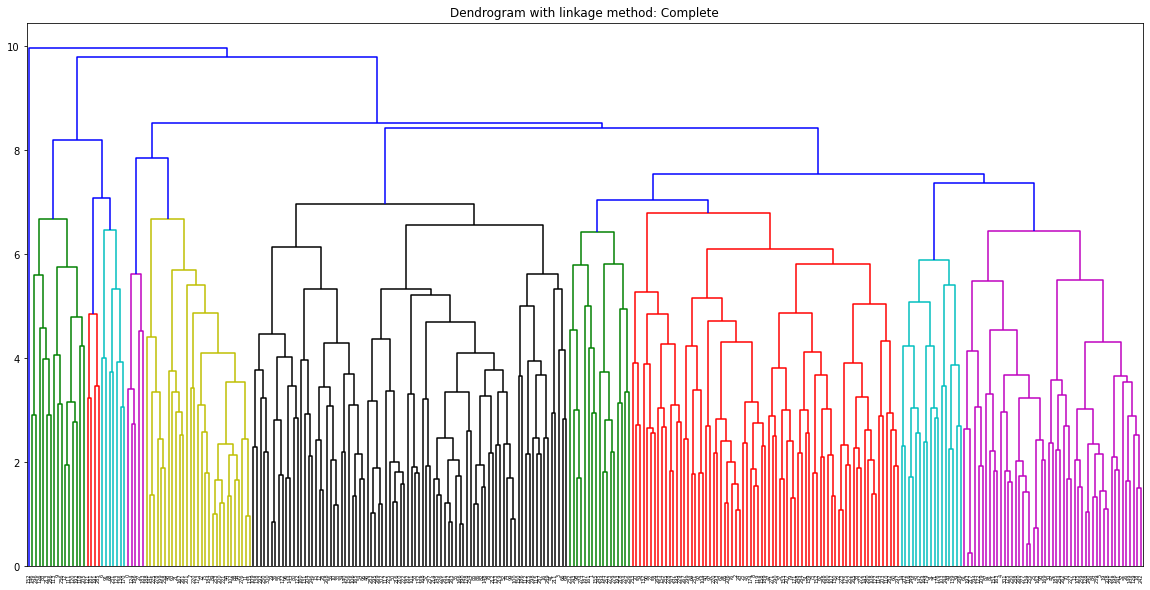

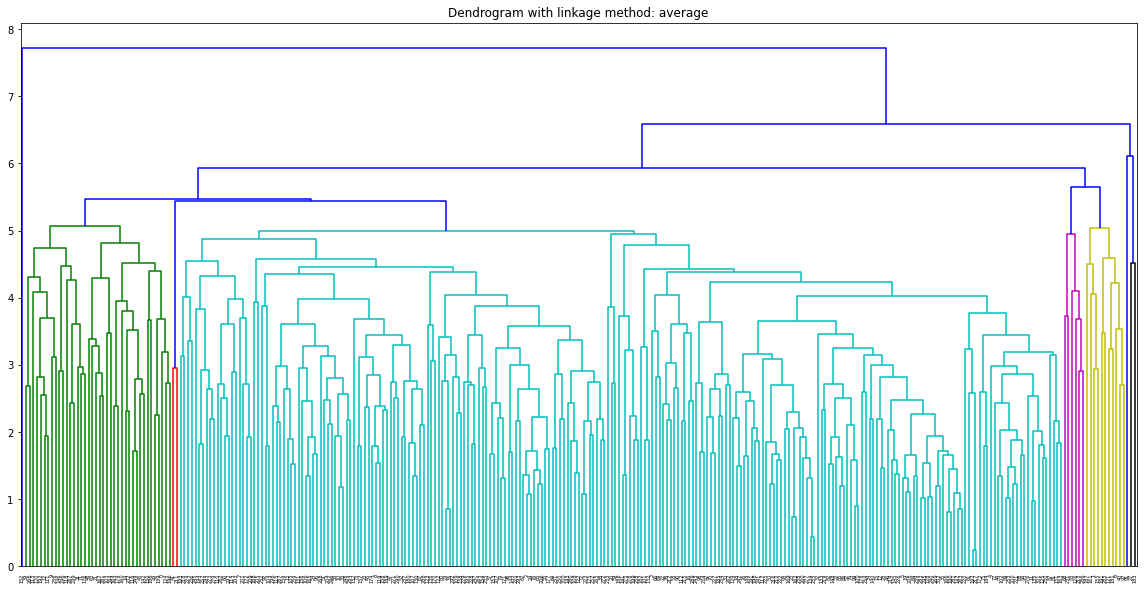

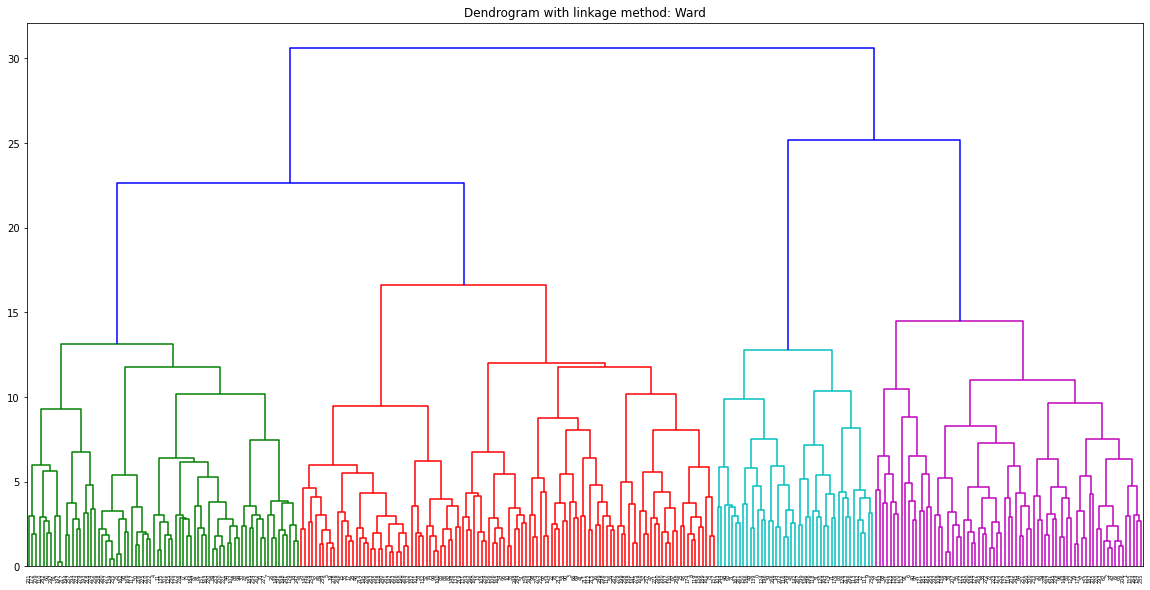

In [8]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Complete")
dendrogram(linkage(X_std,method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std,method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std,method='ward'))
plt.show()

Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?`

In [12]:
linkage_method = ["ward", "average", "complete"]

#Define agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average",affinity="cosine",n_clusters=2)

#fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")


#fit model
agg_cluster = AgglomerativeClustering(linkage="complete",affinity="cosine",n_clusters=2)
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")


#fit model
agg_cluster = AgglomerativeClustering(linkage="ward",affinity="euclidean",n_clusters=2)
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method average: 0.28738522797300897
Silhouette score of linkage method average: 0.14837359969689895
------------------------------------------------
ARI score of linkage method complete: 0.16670290413028055
Silhouette score of linkage method complete: 0.11730765444448985
------------------------------------------------
ARI score of linkage method ward: 0.17333265711401127
Silhouette score of linkage method ward: 0.1387197366557222
------------------------------------------------
